In [1]:
import imageio

In [2]:
# imageio.plugins.ffmpeg.download()

In [3]:
from moviepy.editor import *

In [4]:
videoclip = VideoFileClip("video/test.mp4")

In [14]:
videoclip.audio.write_audiofile("test.wav")

MoviePy - Writing audio in %s


MoviePy - Done.


In [15]:
import IPython
IPython.display.Audio("test.wav")

In [16]:
import parselmouth

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set() # Use seaborn's default style to make attractive graphs

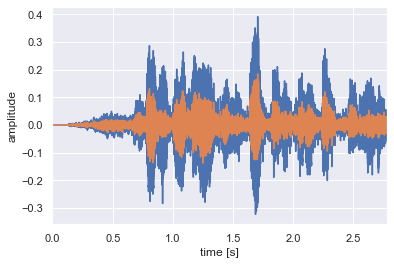

In [17]:
# Plot nice figures using Python's "standard" matplotlib library
snd = parselmouth.Sound("test.mp3")
plt.figure()
plt.plot(snd.xs(), snd.values.T)
plt.xlim([snd.xmin, snd.xmax])
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.show()

In [37]:
from parselmouth.praat import call

In [38]:
def change_pitch(sound, factor):
    manipulation = call(sound, "To Manipulation", 0.001, 75, 600)
    pitch_tier = call(manipulation, "Extract pitch tier")
    call(pitch_tier, "Multiply frequencies", sound.xmin, sound.xmax, factor)
    call([pitch_tier, manipulation], "Replace pitch tier")
    return call(manipulation, "Get resynthesis (overlap-add)")

In [41]:
import ipywidgets
import glob
from IPython.display import Audio

def interactive_change_pitch(audio_file, factor):
    sound = parselmouth.Sound(audio_file)
    sound_changed_pitch = change_pitch(sound, factor)
    return Audio(data=sound_changed_pitch.values, rate=sound_changed_pitch.sampling_frequency)

w = ipywidgets.interact(interactive_change_pitch, audio_file="test.wav", factor=ipywidgets.FloatSlider(min=0.25, max=4, step=0.05, value=1.5))


interactive(children=(Text(value='test.wav', description='audio_file'), FloatSlider(value=1.5, description='fa…